## Starter code for the regression mini-project.
    
    Loads up/formats a modified version of the dataset
    (why modified?  we've removed some trouble points
    that you'll find yourself in the outliers mini-project).

    Draws a little scatterplot of the training/testing data

    You fill in the regression code where indicated:

In [104]:
import sys
import pickle
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit
dictionary = pickle.load( open("../final_project/final_project_dataset_modified.pkl", "r") )

#print dictionary[dictionary.keys()[0]].keys()


 ## list the features you want to look at--first item in the 
 ## list will be the "target" feature

In [122]:

features_list = ["bonus", "salary"]
data = featureFormat( dictionary, features_list, remove_any_zeroes=True)
target, features = targetFeatureSplit( data )






## Getting the outlier

79
median2: 750000.0

mean: 1072704.03797
median: 750000.0
[   70000.   100000.   100000.   200000.   200000.   200000.   250000.
   250000.   300000.   300000.   300000.   325000.   325000.   325000.
   350000.   350000.   400000.   400000.   400000.   400000.   425000.
   450000.   500000.   500000.   509870.   600000.   600000.   600000.
   600000.   600000.   600000.   650000.   700000.   700000.   700000.
   700000.   700000.   750000.   750000.   750000.   750000.   788750.
   800000.   800000.   800000.   800000.   850000.   850000.   850000.
   900000.   900000.  1000000.  1000000.  1000000.  1000000.  1000000.
  1000000.  1100000.  1100000.  1150000.  1200000.  1200000.  1250000.
  1300000.  1350000.  1500000.  1500000.  1700000.  1750000.  2000000.
  2000000.  2500000.  2600000.  3000000.  3000000.  3100000.  4175000.
  5249999.  8000000.]

[   70000.   100000.   100000.   200000.   200000.   200000.   250000.
   250000.   300000.   300000.   300000.   325000.   325000.   325

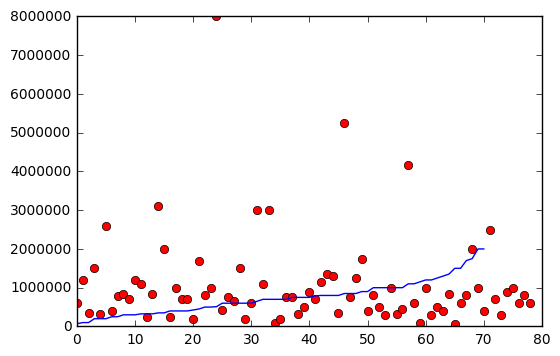

In [148]:

import numpy as np

def remove_outlier(data):
    data = np.sort(data)
    #print '------------------------'
    
    h = len(data)/2
    data1 = data[:h]
    data2 = data[h:]
    
    q1 = np.median(data1)
    q3 = np.median(data2)
    IQR = q3 - q1
    
    #print "Q1:", q1
    #print "Q3:", q3
    #print "IQR:", IQR
    
    limit_min = q1 - 1.5 * IQR
    limit_max = q3 + 1.5 * IQR
    
    data_ = data[data > limit_min]
    data_ = data_[data_ < limit_max]
    
    #print '------------------------'
    
    return data_
    
    
    
    
target_arr = np.array(target)
target_arr = np.sort(target_arr)

size = len(target_arr)
print size
i = size/2 
median = 0.5*(target_arr[i] + target_arr[i+1])
print "median2:", median
                                         
print 

print "mean:",target_arr.mean()
print "median:",np.median(target_arr)

print target_arr
print 

plt.plot(target,'o', color='r')

target_ = remove_outlier(target_arr)
print target_
print "size new targer:", len(target_)

plt.plot(target_, color='b')

plt.show()



### training-testing split needed in regression, just like classification

In [106]:
from sklearn.cross_validation import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.5, random_state=42)
train_color = "b"
test_color = "r"

In [107]:

### Your regression goes here!
### Please name it reg, so that the plotting code below picks it up and 
### plots it correctly. Don't forget to change the test_color above from "b" to
### "r" to differentiate training points from test points.

from sklearn.linear_model import LinearRegression
import numpy as np
reg = LinearRegression()

reg.fit(feature_train, target_train)

feature = np.array(feature_train)

print "mean", feature.mean()
print "median:", np.median(feature)
print "slope:", reg.coef_
print "intercept:", reg.intercept_

print "score: ", reg.score(feature_test, target_test)


mean 257025.179487
median: 261879.0
slope: [ 5.44814029]
intercept: -102360.543294
score:  -1.48499241737


### Outliers

### draw the scatterplot, with color-coded training and testing points

In [108]:
import matplotlib.pyplot as plt

for feature, target in zip(feature_test, target_test):
    plt.scatter( feature, target, color=test_color ) 

for feature, target in zip(feature_train, target_train):
    plt.scatter( feature, target, color=train_color ) 

### labels for the legend
plt.scatter(feature_test[0], target_test[0], color=test_color, label="test")
plt.scatter(feature_test[0], target_test[0], color=train_color, label="train")


### draw the regression line, once it's coded

slope: [ 2.27410114]


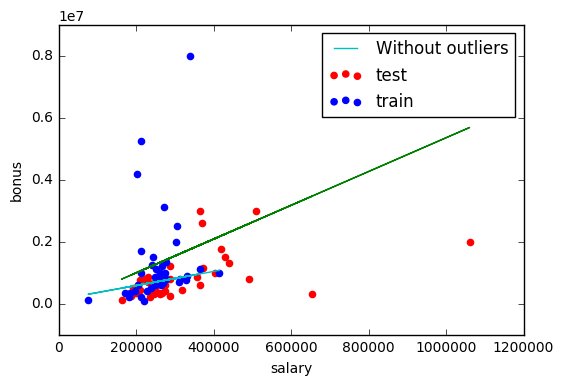

In [109]:

try:
    plt.plot( feature_test, reg.predict(feature_test), color='g')
except NameError:
    pass

reg.fit(feature_test, target_test)
print "slope:", reg.coef_
plt.plot(feature_train, reg.predict(feature_train), color="c", label='Without outliers')  

plt.xlabel(features_list[1])
plt.ylabel(features_list[0])
plt.legend()
plt.show()